# Posttest 5

# Cantika Fitri Ayu Darmayanti 2009106045

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings

In [92]:
warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv("clean_test.csv")

In [94]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,741,742,743,744,745,746,747,748,749,750
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,4181.971005,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN

In [95]:
X = data[['Num_Bank_Accounts','Interest_Rate','Monthly_Inhand_Salary']]
y = data['Month']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [97]:
modelKNN = KNeighborsClassifier(n_neighbors=5)

In [98]:
modelKNN.fit(X_train, y_train) #untuk melihat model yang kita bentuk

KNeighborsClassifier()

In [99]:
print("Akurasi training set model KNN dengan jumlah neighbors=2 : ", round(modelKNN.score(X_train, y_train),2))
print("Akurasi test set model KNN dengan jumlah neighbors=2 : ", round(modelKNN.score(X_test, y_test),2))

Akurasi training set model KNN dengan jumlah neighbors=2 :  0.36
Akurasi test set model KNN dengan jumlah neighbors=2 :  0.1


# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
gs = GaussianNB()

In [102]:
gs.fit(X_train, y_train)

GaussianNB()

In [103]:
print("Akurasi training set model Naive Bayes  : ", round(gs.score(X_train, y_train),2))
print("Akurasi test set model Naive Bayes : ", round(gs.score(X_test, y_test),2)) #round itu di bulatkan

Akurasi training set model Naive Bayes  :  0.25
Akurasi test set model Naive Bayes :  0.25


# Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [105]:
X = data[['Num_Bank_Accounts','Interest_Rate','Monthly_Inhand_Salary']]
y = data['Month']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [107]:
modelKNN = KNeighborsClassifier(n_neighbors=5)

In [108]:
modelKNN.fit(X_train, y_train) #untuk melihat model yang kita bentuk

KNeighborsClassifier()

In [109]:
y_pred = modelKNN.predict(X_test)

In [110]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 620, 1417,  998,  681],
       [1609,  454,  980,  688],
       [1570, 1236,  333,  687],
       [1604, 1084,  768,  271]], dtype=int64)

In [111]:
confusion_matrix(y_test, y_pred)

array([[ 620, 1417,  998,  681],
       [1609,  454,  980,  688],
       [1570, 1236,  333,  687],
       [1604, 1084,  768,  271]], dtype=int64)

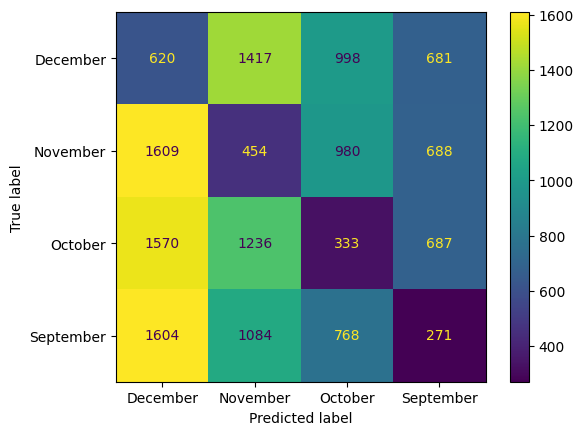

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN.classes_)
disp.plot()

## Membandingkan Accuracy Dari KNN dan Naive Bayes

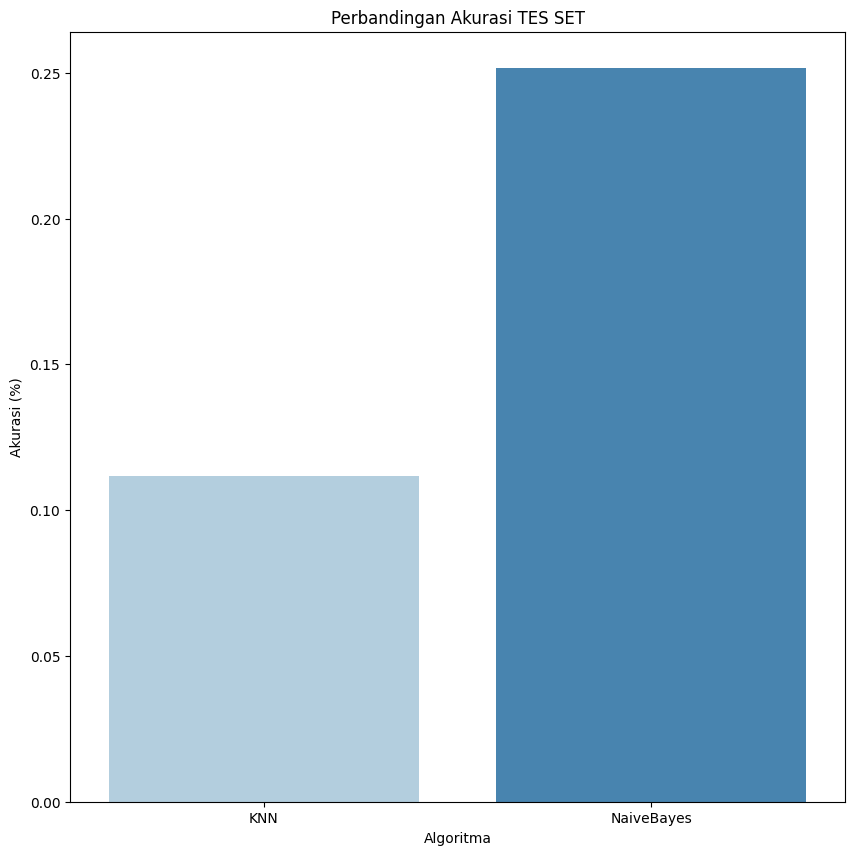

In [113]:
#tes set
algoritma = ["KNN","NaiveBayes"]
akurasi = [modelKNN.score(X_test, y_test),gs.score(X_train, y_train)]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='Blues')

plt.title("Perbandingan Akurasi TES SET")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

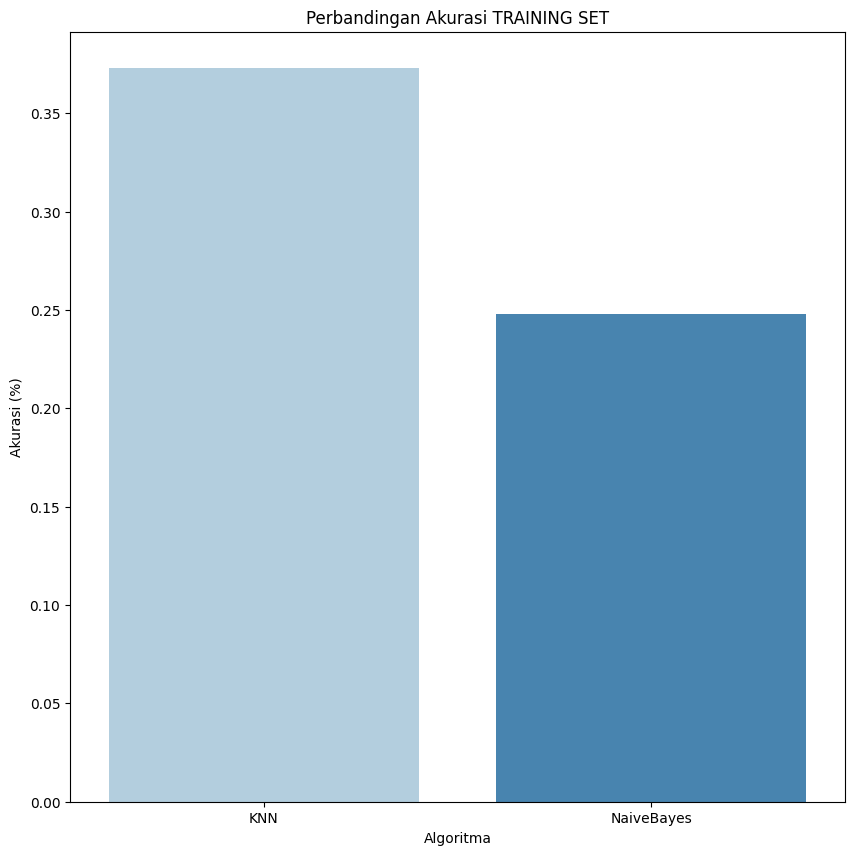

In [114]:
#training set
algoritma = ["KNN","NaiveBayes"]
akurasi = [modelKNN.score(X_train, y_train),gs.score(X_test, y_test)]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='Blues')

plt.title("Perbandingan Akurasi TRAINING SET")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()